### Análises e Gráficos de Discentes com melhores avaliações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\mateu\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mateu\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
avaliacao_dct = pd.read_csv('../../data/processed/avaliacoes_dct.csv')

In [3]:
# Agrupar os dados por docente e calcular as médias e somas necessárias
avaliacoes_docente = avaliacao_dct.groupby(['id_docente', 'nome_docente']).agg({
  'qtd_discentes': 'sum',
  'postura_profissional_media': 'mean',
  'postura_profissional_DP': 'mean',
  'atuacao_profissional_media': 'mean',
  'atuacao_profissional_DP': 'mean'
}).reset_index()

In [4]:
avaliacoes_docente

,id_docente,nome_docente,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP
0,15373,ALMIR MIRANDA FERREIRA,724,9.600625,0.820312,9.066875,1.445312
1,34950,HUMBERTO RABELO,555,8.854615,1.444231,8.915769,1.546923
2,5752382,FLAVIUS DA LUZ E GORGONIO,1081,9.395682,1.082955,8.803864,2.066136
3,5753055,FABRICIO VALE DE AZEVEDO GUERRA,586,9.183704,1.324815,8.756296,1.849259
4,5753111,TACIANO DE MORAIS SILVA,620,9.141667,1.355667,8.781667,1.831000
5,5753664,JOAO BATISTA BORGES NETO,311,9.650909,0.757273,9.014545,1.509545
6,5753665,JOAO PAULO DE SOUZA MEDEIROS,836,9.354286,1.078000,8.748857,1.842571
7,5753697,LUIZ PAULO DE ASSIS BARBOSA,603,9.334545,1.155455,8.620909,1.899545
8,5754623,KARLIANE MEDEIROS OVIDIO VALE,555,9.310400,1.189600,8.740400,1.755200
9,5760893,FRANCISCO MARCIO BARBOZA,883,9.198966,1.370345,8.576897,1.826552


In [5]:
# Ordenar os docentes pela média de postura profissional e selecionar os 3 melhores
top_postura = avaliacoes_docente.sort_values(by='postura_profissional_media', ascending=False).head(3)
top_postura

,id_docente,nome_docente,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP
5,5753664,JOAO BATISTA BORGES NETO,311,9.650909,0.757273,9.014545,1.509545
0,15373,ALMIR MIRANDA FERREIRA,724,9.600625,0.820312,9.066875,1.445312
10,5762863,ANNA CLAUDIA DOS SANTOS NOBRE,252,9.600000,1.046667,8.661667,2.025000


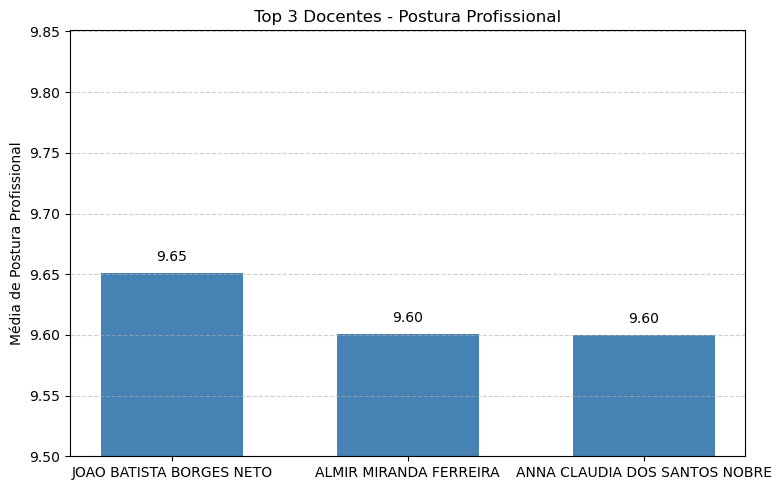

In [6]:
plt.figure(figsize=(8, 5))

x = top_postura['nome_docente']
y = top_postura['postura_profissional_media']

plt.bar(x, y, color='steelblue', width=0.6)

for i, valor in enumerate(y):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center')

plt.ylabel('Média de Postura Profissional')
plt.title('Top 3 Docentes - Postura Profissional')
plt.ylim(min(y) - 0.1, max(y) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
# Ordenar os docentes pela média de atuação profissional e selecionar os 3 melhores
top_atuacao = avaliacoes_docente.sort_values(by='atuacao_profissional_media', ascending=False).head(3)
top_atuacao

,id_docente,nome_docente,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP
0,15373,ALMIR MIRANDA FERREIRA,724,9.600625,0.820312,9.066875,1.445312
11,5763583,ARTHUR EMANOEL CASSIO DA SILVA E SOUZA,43,9.505000,1.020000,9.040000,1.355000
5,5753664,JOAO BATISTA BORGES NETO,311,9.650909,0.757273,9.014545,1.509545


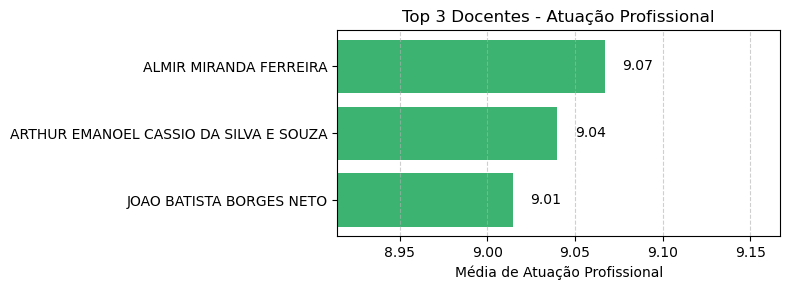

In [14]:
plt.figure(figsize=(8, 3))

min_val = top_atuacao['atuacao_profissional_media'].min() - 0.1
max_val = top_atuacao['atuacao_profissional_media'].max() + 0.1
plt.xlim(min_val, max_val)

plt.barh(top_atuacao['nome_docente'], top_atuacao['atuacao_profissional_media'], color='mediumseagreen')
plt.xlabel('Média de Atuação Profissional')
plt.title('Top 3 Docentes - Atuação Profissional')
plt.gca().invert_yaxis()

for i, valor in enumerate(top_atuacao['atuacao_profissional_media']):
    plt.text(valor + 0.01, i, f"{valor:.2f}", va='center')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()